# Assignment Expectations/Steps -


Data Set 			- 	http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description 	- 	http://www.stat.ufl.edu/~winner/data/airq402.txt

1.	Import and store the data in a data frame. (2.5 points)
2.	Remove the outliers from the data (5 points)
3.	Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
4.	Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
5.	Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
6.	Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
7.	Print the coefficients & intercepts of the linear regression model (5 points)
8.	Print the accuracy of the overall model (2.5 points)

In [1]:
# Calling all the required libraries.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline


# Preprocessing
from sklearn import preprocessing


# Train-test split and sickit linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Metrics and Accuracy store
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

In [2]:
#1) Import and store the data in a data frame

col_names =["City1","City2","Avg_Fare","Distance","Avg_Wkly_Psngr","Mkt_Lead_AL","Mkt_Share","Avg_Fare1","Low_Price_AL","Mkt_Share1","Price"]
air_data = pd.read_csv('airq402_data.txt', sep = '\s+', names =col_names)
air_data.head()

,City1,City2,Avg_Fare,Distance,Avg_Wkly_Psngr,Mkt_Lead_AL,Mkt_Share,Avg_Fare1,Low_Price_AL,Mkt_Share1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [3]:
# Starting with pre-processing on data before moving any steps forward
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1             1000 non-null object
City2             1000 non-null object
Avg_Fare          1000 non-null float64
Distance          1000 non-null int64
Avg_Wkly_Psngr    1000 non-null float64
Mkt_Lead_AL       1000 non-null object
Mkt_Share         1000 non-null float64
Avg_Fare1         1000 non-null float64
Low_Price_AL      1000 non-null object
Mkt_Share1        1000 non-null float64
Price             1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [4]:
# EDA Checks needs to be done before doing any further steps:-
# C1) Check if there is missing values(NaN) in the data 

air_data.isnull().values.any()

# No Null values in Dataframe

False

In [5]:
# C2) Check if there is any duplicate data and drop if it exists

len(air_data)
# 1000 records

# Dropping duplicates if any
air_data.drop_duplicates(inplace =True)
len(air_data)

# No duplicate data to drop as row count is same

1000

In [6]:
# C3) There are 4 category columns. 
# Lot of unique values in categorical columns such as: City1, City2, Market Leading Airlines, Low Price Airlines.


print(air_data['City1'].nunique())
print(air_data['City2'].nunique())
print(air_data['Mkt_Lead_AL'].nunique())
print(air_data['Low_Price_AL'].nunique())

#  We need to convert them. Total unique elements in column are 210.  If we use 1 hot encoder or get dummies, 
# it will create 206 new columns.  Total columns in dataframe will be more than 210. While total records are only 1000. 
# Using get_dummies may introduce "CURSE OF DIMENSIONALITY" as the data will be very sparse because of number of feature increased. 
# We will explore other measures.

90
85
16
19


In [7]:
# C4) To avoid the aboive issue, we will be using label enconder and converting type as "Category".
def le_preprocess():
    object_list = list(air_data.select_dtypes(include ='object').columns)
    for i in object_list:
        le = preprocessing.LabelEncoder()
        le.fit(air_data[i].unique())
        air_data[i] = le.transform(air_data[i])
        air_data[i] = air_data[i].astype('category')

In [8]:
# Calling Label Encoder Pre processing function and see if the data in the category columns is converted to numerical.
le_preprocess()
air_data.head()

,City1,City2,Avg_Fare,Distance,Avg_Wkly_Psngr,Mkt_Lead_AL,Mkt_Share,Avg_Fare1,Low_Price_AL,Mkt_Share1,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [9]:
# Object columns converted to "Category" and data is numerical now. This should help in processing further.
air_data.info()

# We can observe that Category columns(City1, Market Leading Airlines etc) have numerical data but their datatype is Category. 
# This should help in model building as they wont be treated as numerical values any more. 

# Now we can do step 2 of removing outliers.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1             1000 non-null category
City2             1000 non-null category
Avg_Fare          1000 non-null float64
Distance          1000 non-null int64
Avg_Wkly_Psngr    1000 non-null float64
Mkt_Lead_AL       1000 non-null category
Mkt_Share         1000 non-null float64
Avg_Fare1         1000 non-null float64
Low_Price_AL      1000 non-null category
Mkt_Share1        1000 non-null float64
Price             1000 non-null float64
dtypes: category(4), float64(6), int64(1)
memory usage: 74.3 KB


In [10]:
# 2)  Removing outliers

# Outliers can be found using 2 below methods.
# Finding outlier using mean and iqr method
    # 1) Mean method:
    # 2) IQR Method:
# We will create 2 functions which will identify outliers using mean method and iqr method. Then we will compare the data 
# returned by both the functions and see how many outliers they return.


# 1) Mean mthod:
def outlier_mean(df):
    mylist = list(df.select_dtypes(include =['float64', 'int64']).columns)
    outlier1 = pd.DataFrame()
    outlier2 = pd.DataFrame()
    for i in mylist:
        outlier2 = pd.concat([outlier2, outlier1.append(df[df[i] > df[i].mean()+3*df[i].std()])])
        outlier2 = pd.concat([outlier2, outlier1.append(df[df[i] < df[i].mean()-3*df[i].std()])])
    outlier2.drop_duplicates(inplace =True)    
    return outlier2

In [11]:
# getting outlier using mean method
temp_mean = outlier_mean(air_data)
temp_mean.info()

# Mean method of finding outlier returns total 34 records.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 213 to 774
Data columns (total 11 columns):
City1             34 non-null category
City2             34 non-null category
Avg_Fare          34 non-null float64
Distance          34 non-null int64
Avg_Wkly_Psngr    34 non-null float64
Mkt_Lead_AL       34 non-null category
Mkt_Share         34 non-null float64
Avg_Fare1         34 non-null float64
Low_Price_AL      34 non-null category
Mkt_Share1        34 non-null float64
Price             34 non-null float64
dtypes: category(4), float64(6), int64(1)
memory usage: 10.1 KB


In [12]:
# Getting outlier using IQR method
def outlier_iqr(df):
    mylist = list(df.select_dtypes(include =['float64', 'int64']).columns)
    outlier1 = pd.DataFrame()
    outlier2 = pd.DataFrame()
    for i in mylist:
        q1,q3 = np.percentile(df[i],[25,75])
        iqr = q3-q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr) 
        outlier2 = pd.concat([outlier2, outlier1.append(df[df[i] < lower_bound])])
        outlier2 = pd.concat([outlier2, outlier1.append(df[df[i] > upper_bound])])
    outlier2.drop_duplicates(inplace =True)  
    return outlier2

In [13]:
temp_iqr = outlier_iqr(air_data)
temp_iqr.info()

# IQR menthod of finding outlier returns total 115 records

# There is considerable difference in the outliers idenitified by the IQR method and Mean method. 
# mean method gives 34 outlier records while iqr method gives 115 records. 
# We will accept the result of the mean method as we have to drop few records and test using that.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 197 to 972
Data columns (total 11 columns):
City1             115 non-null category
City2             115 non-null category
Avg_Fare          115 non-null float64
Distance          115 non-null int64
Avg_Wkly_Psngr    115 non-null float64
Mkt_Lead_AL       115 non-null category
Mkt_Share         115 non-null float64
Avg_Fare1         115 non-null float64
Low_Price_AL      115 non-null category
Mkt_Share1        115 non-null float64
Price             115 non-null float64
dtypes: category(4), float64(6), int64(1)
memory usage: 15.5 KB


In [14]:
# Removing the outliers using mean method
air_datafinal= pd.concat([air_data,temp_mean]).drop_duplicates(keep=False)
air_datafinal.head()

,City1,City2,Avg_Fare,Distance,Avg_Wkly_Psngr,Mkt_Lead_AL,Mkt_Share,Avg_Fare1,Low_Price_AL,Mkt_Share1,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [15]:
air_datafinal.info()

# Dropped 34 records which were identified as outlier by mean method which ran above. Now we have 966 records(1000-34)
# This completes step 2 of removing outliers from data. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 999
Data columns (total 11 columns):
City1             966 non-null category
City2             966 non-null category
Avg_Fare          966 non-null float64
Distance          966 non-null int64
Avg_Wkly_Psngr    966 non-null float64
Mkt_Lead_AL       966 non-null category
Mkt_Share         966 non-null float64
Avg_Fare1         966 non-null float64
Low_Price_AL      966 non-null category
Mkt_Share1        966 non-null float64
Price             966 non-null float64
dtypes: category(4), float64(6), int64(1)
memory usage: 72.0 KB


In [16]:
# 3) Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.
# Dividing the columns for  X and y as independent and dependent columns

X= air_datafinal.drop('Avg_Fare', axis =1)
y = air_datafinal['Avg_Fare']
list(X.columns)

['City1',
 'City2',
 'Distance',
 'Avg_Wkly_Psngr',
 'Mkt_Lead_AL',
 'Mkt_Share',
 'Avg_Fare1',
 'Low_Price_AL',
 'Mkt_Share1',
 'Price']

In [17]:
#4) Drop the independent variables which has less than 0.1 correlation with the dependent variable
#  Finding the Independent variables which has correlation less than 0.1 and dropping them
#  Create the function which calculates the correlation and drops which has less than 0.1


def del_corr(df_Indpndnt, df_Dpndnt):

    for i in df_Indpndnt.columns:
        corr_list[i] =df_Dpndnt.corr(df_Indpndnt[i])
        if corr_list[i]<0.1:
            print("Independent columns getting deleted are: %s" %(i))
            df_Indpndnt.drop(i, axis =1, inplace =True)   

In [18]:
# Printing the correlation and all the columns which were deleted.
corr_list ={}
del_corr(X,y)
print(corr_list)


Independent columns getting deleted are: City1
Independent columns getting deleted are: City2
Independent columns getting deleted are: Avg_Wkly_Psngr
Independent columns getting deleted are: Mkt_Lead_AL
Independent columns getting deleted are: Mkt_Share
Independent columns getting deleted are: Low_Price_AL
Independent columns getting deleted are: Mkt_Share1
{'City1': -0.09508344254165668, 'City2': -0.04344331281701688, 'Distance': 0.5520146129480717, 'Avg_Wkly_Psngr': -0.22212099347507477, 'Mkt_Lead_AL': -0.3350882707174748, 'Mkt_Share': -0.22812932446065423, 'Avg_Fare1': 0.9811032910471461, 'Low_Price_AL': -0.17122633999254008, 'Mkt_Share1': -0.4760232292317101, 'Price': 0.8593621264938924}


In [19]:
# Final column list available for model building are:-
X.columns

Index(['Distance', 'Avg_Fare1', 'Price'], dtype='object')

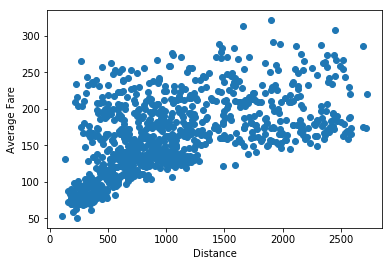

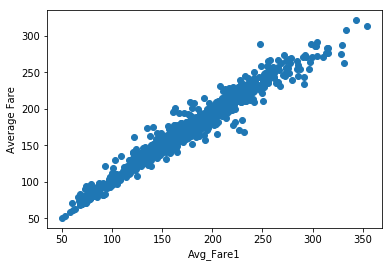

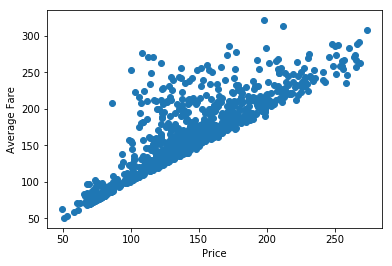

In [20]:
#5) Create scatter Plot of Independent Variable vs Dependent Variable.
for i in X:
    plt.scatter(X[i],y)
    plt.xlabel(i)
    plt.ylabel('Average Fare')
    plt.show()

# Observation from scatter Plots:-

# Here we can see, average fare(dependent variable) has strong correlation with Average Fare1 and Price (independent feature.) 
# This is also evident from the correlation function obtained from the above function above.
# Reason for Strong correlation with Average Fare1 is because this column corresponds to the fare of low cost airlines while 
# Average fare(dependent variable) corresponds to Markel Leading Airlines.
# Out of 16  Market leading airlines belong into the (19) Low cost Airlines for those routes. 
# Hence there is strong correlation between both the fares and Price.


In [21]:
# 6) Divide the data set into training and test data set and build a Multiple Linear Regression model.

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size =0.2,random_state =2)
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
#7) Print the coefficients & intercepts of the linear regression model (5 points)
# Mean method model coefficients

#print(model.coef_)
print('Model Intercept is: %f, '%(model.intercept_))
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Model Intercept is: 8.004623, 


,Coefficient
Distance,0.001557
Avg_Fare1,0.750679
Price,0.202397


In [23]:
# Comparing the values of actual and prediction
# Calculating the y prediction

ypred = model.predict(xtest)

df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})
df.head(25)

,Actual,Predicted
351,184.75,187.176791
185,252.85,234.858874
733,139.40,142.710954
200,186.23,177.744342
143,103.89,106.911078
573,125.98,126.991397
356,142.89,138.976751
162,176.63,166.306149
171,213.08,209.212976
719,232.41,241.673909


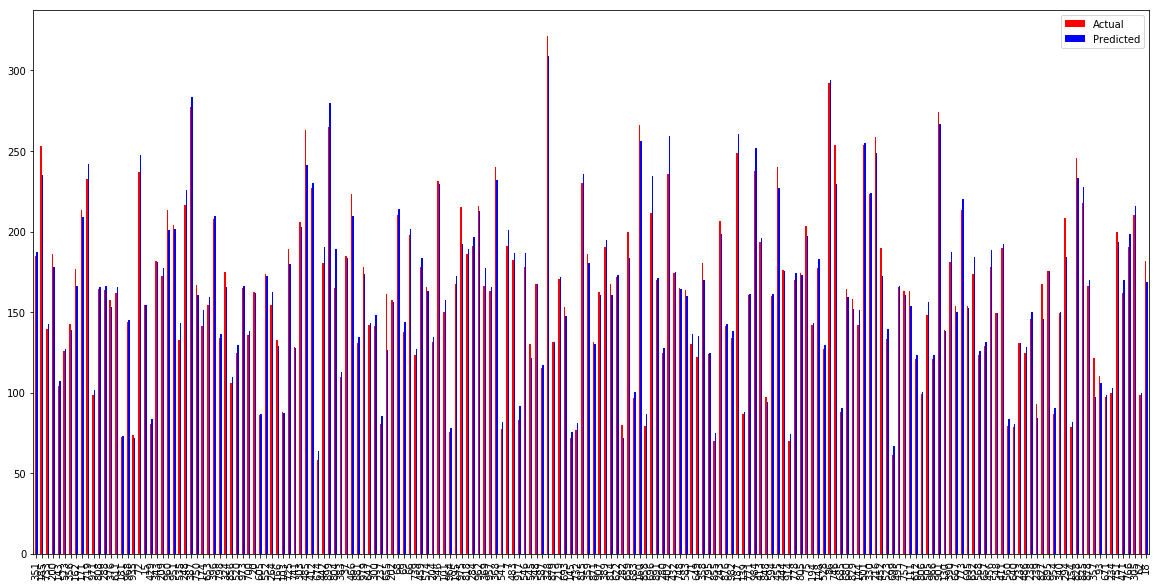

In [24]:
# Plotting the graph the predicted and actual values:
#plt.scatter(df['Actual'], df['Predicted'])
df.plot(kind='bar', color=['r','b'], figsize=(20,10))
plt.show()


In [25]:
# 8) Print the accuracy of the overall model

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = sqrt(mse)
r2score = r2_score(ytest, ypred)
print('Mean Absolute Error is: %f, '%(mae))
print('Mean Squared Error is: %f, '%(mse))
print('Root Mean Squared Error is: %f, '%(rmse))
print('Model Score is: %f, '%(r2score))

Mean Absolute Error is: 5.915666, 
Mean Squared Error is: 68.342086, 
Root Mean Squared Error is: 8.266927, 
Model Score is: 0.974088, 
